In [246]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [247]:
Enb = pd.read_excel("D:/pyproj/datasource/data/ENB2012_data.xlsx")
print(Enb.sample(10))

       X1     X2     X3     X4   X5  X6    X7  X8     Y1     Y2
308  0.76  661.5  416.5  122.5  7.0   2  0.25   1  36.96  36.85
621  0.62  808.5  367.5  220.5  3.5   3  0.40   2  17.23  17.38
166  0.76  661.5  416.5  122.5  7.0   4  0.10   3  32.33  34.48
412  0.71  710.5  269.5  220.5  3.5   2  0.25   3  12.41  14.92
65   0.79  637.0  343.0  147.0  7.0   3  0.10   1  37.12  35.28
186  0.64  784.0  343.0  220.5  3.5   4  0.10   3  15.12  19.37
725  0.90  563.5  318.5  122.5  7.0   3  0.40   5  35.01  33.14
372  0.66  759.5  318.5  220.5  3.5   2  0.25   2  13.05  15.89
359  0.76  661.5  416.5  122.5  7.0   5  0.25   2  36.45  36.81
724  0.90  563.5  318.5  122.5  7.0   2  0.40   5  35.67  33.94


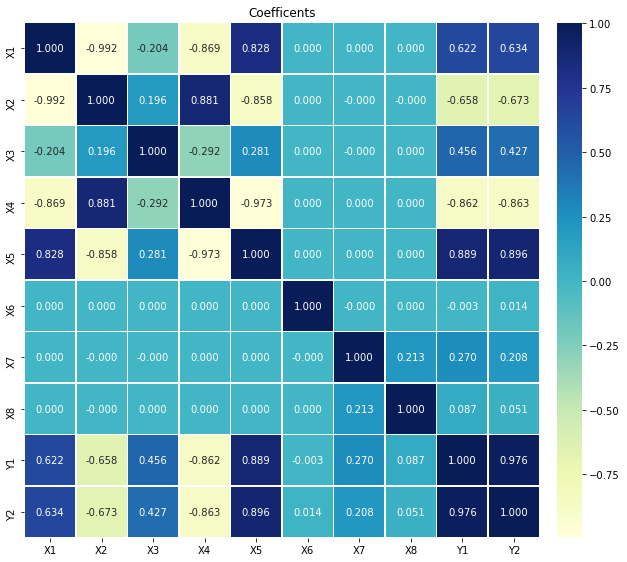

In [248]:
datacor = np.corrcoef(Enb,rowvar=0)
datacor = pd.DataFrame(data = datacor,columns=Enb.columns,index=Enb.columns)
plt.figure(figsize=(10,10))
ax = sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=.5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
ax.set_title("Coefficents")
plt.show()

In [249]:
formula = "Y1~X1+X2+X3+X4+X5+X6+X7+X8"
lm = smf.ols(formula,Enb).fit()

In [250]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:30:17   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.0

In [251]:
from itertools import combinations

In [252]:
variable = []
aic = []
bic = []
Cond = []
R_squared = []

In [253]:
for index in range(1,len(Enb.columns.values[0:-2])):
    var = list(combinations(Enb.columns.values[0:-2],index))
    for v in var:
        formulav = "Y1"+"~"+"+".join(v)
        lm = smf.ols(formulav,Enb).fit()
        bic.append(lm.bic)
        aic.append(lm.aic)
        variable.append(v)
        Cond.append(lm.condition_number)
        R_squared.append(lm.rsquared)

In [254]:
df = pd.DataFrame()
df["variables"] = variable
df["aic"] = aic
df["bic"] = bic
df["Cond"] = Cond
df["R_squared"] = R_squared
df.sort_values("bic",ascending=True).head(10)


,variables,aic,bic,Cond,R_squared
194,"(X1, X4, X5, X7, X8)",3841.303792,3869.166530,7.622924e+03,0.915722
118,"(X1, X4, X5, X7)",3847.791626,3871.010575,7.617974e+03,0.914785
235,"(X1, X3, X4, X5, X7, X8)",3838.974828,3871.481357,7.463448e+04,0.916195
226,"(X1, X2, X3, X5, X7, X8)",3838.974828,3871.481357,1.525005e+05,0.916195
248,"(X1, X2, X3, X4, X5, X7, X8)",3838.974828,3871.481357,2.838048e+16,0.916195
230,"(X1, X2, X4, X5, X7, X8)",3838.974828,3871.481357,1.428812e+05,0.916195
183,"(X1, X3, X4, X5, X7)",3845.510375,3873.373114,7.463078e+04,0.915259
167,"(X1, X2, X3, X5, X7)",3845.510375,3873.373114,1.524963e+05,0.915259
173,"(X1, X2, X4, X5, X7)",3845.510375,3873.373114,1.428772e+05,0.915259
219,"(X1, X2, X3, X4, X5, X7)",3845.510375,3873.373114,2.831853e+16,0.915259


In [255]:
formula = "Y1~X1+X4+X5+X7+X8"
lm = smf.ols(formula,Enb).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1656.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:30:18   Log-Likelihood:                -1914.7
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     762   BIC:                             3869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4486      4.186     10.859      0.0

In [256]:
Y_pre = lm.predict(Enb)
metrics.mean_absolute_error(Y_pre,Enb.Y1)

2.0853894644526876

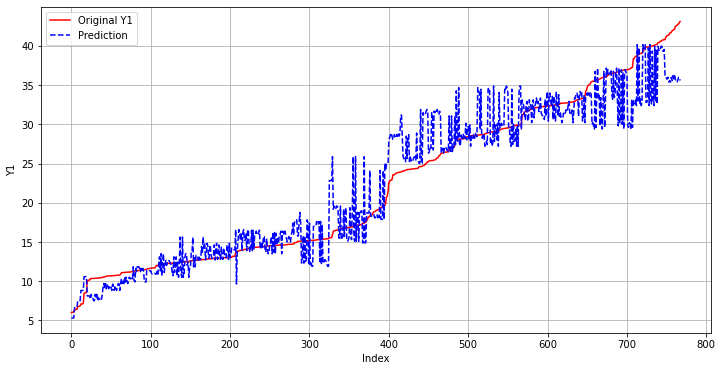

In [257]:
Y_pre = lm.predict(Enb)
index = np.argsort(Enb.Y1)
plt.figure(figsize=(12,6))
plt.plot(np.arange(Enb.shape[0]),Enb.Y1[index],"r",label= "Original Y1")
plt.plot(np.arange(Enb.shape[0]),Y_pre[index],"b--",label="Prediction")
plt.legend()
plt.grid("on")
plt.xlabel("Index")
plt.ylabel("Y1")
plt.show()

In [258]:
diabete = pd.read_csv("D:/pyproj/datasource/data/diabetes.csv",sep="\t")
print(diabete.sample(20))

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
234   61    1  30.0  108.00  194  100.0  52.0  3.73  5.3471  105  246
121   66    1  28.0  101.00  195  129.2  40.0  5.00  4.8598   94  173
252   50    1  31.9   78.33  207  149.2  38.0  5.45  4.5951   84   91
118   33    2  25.4  102.00  206  141.0  39.0  5.00  4.8675  105  179
83    38    1  27.3   81.00  146   81.6  47.0  3.00  4.4659   81  210
23    61    2  32.0  103.67  210   85.2  35.0  6.00  6.1070  124  245
78    50    1  21.0   88.00  140   71.8  35.0  4.00  5.1120   71  252
175   67    1  22.8   87.00  166   98.6  52.0  3.00  4.3438   92  127
379   48    1  22.8  101.00  110   41.6  56.0  2.00  4.1271   97   40
319   54    1  26.8  108.00  176   80.6  67.0  3.00  4.9558  106  191
71    48    1  29.5  131.00  207  132.2  47.0  4.00  4.9345  106  270
162   34    1  29.2   73.00  172  108.2  49.0  4.00  4.3041   91  172
191   47    2  22.5   82.00  131   66.8  41.0  3.00  4.7536   89  178
401   53    1  22.2 

In [259]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error

In [260]:
def lasso_regression(data,test,predictors,pre_y,alpha):
    '''
    :param data:training set
    :param test: test set
    :param predictors: features names
    :param pre_y: labels names
    :param alpha: penalty coefficient
    :return: ret:model penalty coefficient
    '''

    lassoreg = Lasso(alpha=alpha,normalize=True,max_iter=1e5,fit_intercept=False)
    lassoreg.fit(data[predictors],data[pre_y])
    y_pred = lassoreg.predict(test[predictors])
    ret = [alpha]
    ret.append(r2_score(test[pre_y],y_pred))
    ret.append(mean_absolute_error(test[pre_y],y_pred))
    ret.extend(list(lassoreg.coef_))
    return ret

In [261]:
predictors=["AGE","SEX","BMI","BP","S1","S2","S3","S4","S5","S6"]
prey = "Y"
alpha_lasso = np.linspace(0.00005,2,20)
col = ['alpha','r2_score','mae','AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,len(alpha_lasso))]
coef_matrix_lasso = pd.DataFrame(index=ind,columns=col)

np.random.seed(123421)
index = np.random.permutation(diabete.shape[0])
trainindex = index[0:350]
testindex = index[350:-1]
diabete_train = diabete.iloc[trainindex,:]
diabete_test = diabete.iloc[testindex,:]
for i in range(len(alpha_lasso)):
    coef_matrix_lasso.loc[i,:]=lasso_regression(diabete_train,diabete_test,predictors,prey,alpha_lasso[i])

coef_matrix_lasso.sort_values("mae").head(10)



,alpha,r2_score,mae,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
7,0.736874,0.525353,43.8008,-0.0655582,-22.9899,5.62892,0.948303,1.536,-1.64807,-2.93607,-1.34518,0,0.0447103
8,0.842134,0.525235,43.8129,-0.0654818,-22.5892,5.6193,0.943915,1.52802,-1.64791,-2.91251,-1.00061,0,0.0338239
6,0.631613,0.525178,43.8213,-0.0654514,-23.4716,5.62217,0.948063,1.52543,-1.62731,-2.95801,-1.8744,0.727138,0.0487035
9,0.947395,0.525085,43.825,-0.0654056,-22.1884,5.60969,0.939528,1.52004,-1.64775,-2.88895,-0.656048,0,0.0229376
10,1.05266,0.524902,43.8371,-0.0653294,-21.7876,5.60008,0.93514,1.51207,-1.6476,-2.86539,-0.311497,0,0.0120513
11,1.15792,0.524708,43.8531,-0.0653125,-21.3786,5.59134,0.930834,1.50479,-1.64742,-2.84364,-0,0,0.00171681
12,1.26318,0.524691,43.8675,-0.0662355,-20.9097,5.58694,0.926294,1.50409,-1.64739,-2.8398,-0,0,0
13,1.36844,0.524669,43.8808,-0.0673585,-20.4504,5.58071,0.921315,1.50313,-1.64722,-2.83613,-0,0,0
5,0.526353,0.524482,43.8916,-0.0650677,-24.0776,5.59038,0.940777,1.48646,-1.57457,-2.97731,-2.68333,2.56541,0.0420992
14,1.4737,0.524633,43.894,-0.0684817,-19.9912,5.57448,0.916337,1.50217,-1.64705,-2.83247,-0,0,-0


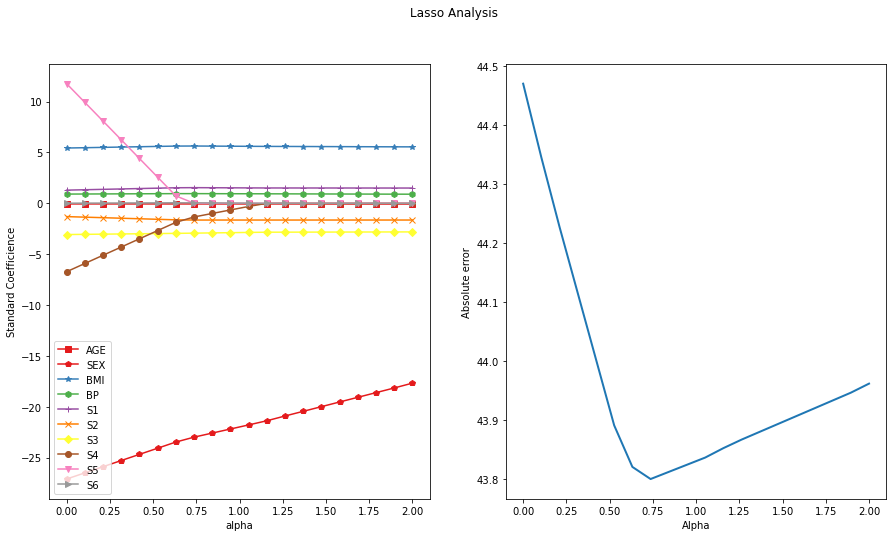

In [262]:
ploty = ["AGE","SEX","BMI","BP","S1","S2","S3","S4","S5","S6"]
shape = ["s","p","*","h","+","x","D","o","v",">"]
plt.figure(figsize=(15,8))
plt.grid("on")
plt.subplot(1,2,1)

for i in np.arange(len(ploty)):
    plt.plot(coef_matrix_lasso["alpha"],coef_matrix_lasso[ploty[i]],color = plt.cm.Set1(i/len(ploty)),label =ploty[i],marker = shape[i] )
    plt.legend()
    plt.xlabel("alpha")
    plt.ylabel("Standard Coefficience")

plt.subplot(1,2,2)

plt.plot(coef_matrix_lasso["alpha"],coef_matrix_lasso["mae"],linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("Absolute error")
plt.suptitle("Lasso Analysis")
plt.show()

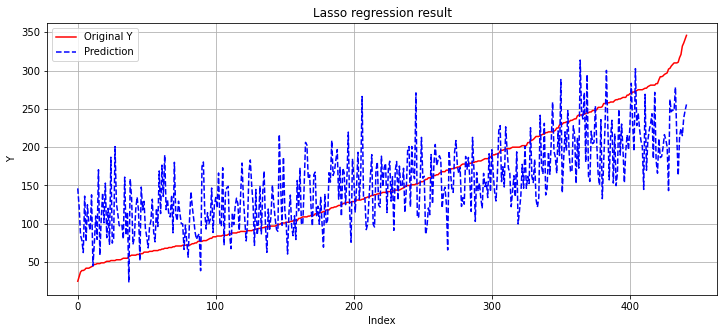

In [263]:
##########################Use Best Lasso Model################################
## We choose alpha = 0.736874
lassoreg = Lasso(alpha=0.736874,normalize=True,max_iter=1e5,fit_intercept=False)
lassoreg.fit(diabete[predictors],diabete[prey])
Y_pre = lassoreg.predict(diabete[predictors])
##Plot
index = np.argsort(diabete.Y)
plt.figure(figsize=(12,5))
plt.plot(np.arange(diabete.shape[0]),diabete.Y[index],"r",label="Original Y")
plt.plot(np.arange(diabete.shape[0]),Y_pre[index],"b--",label = "Prediction")
plt.legend()
plt.grid("on")
plt.xlabel("Index")
plt.ylabel("Y")
plt.title("Lasso regression result")
plt.show()
